In [65]:
import pandas as pd
import numpy as np

In [66]:
df = pd.read_csv("C:/Users/Emre/Desktop/customer_behavior_train_useridTR.csv")

In [67]:
df.shape

(455401, 20)

In [68]:
df["satin_aldi"].value_counts(normalize=True)

satin_aldi
0    0.958074
1    0.041926
Name: proportion, dtype: float64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   userid                   455401 non-null  object
 1   sepet_ikonuna_tiklama    455401 non-null  int64 
 2   listeden_sepet_ekleme    455401 non-null  int64 
 3   detaydan_sepet_ekleme    455401 non-null  int64 
 4   hesap_sayfasina_tiklama  455401 non-null  int64 
 5   kampanyaya_tiklama       455401 non-null  int64 
 6   favoriye_ekleme          455401 non-null  int64 
 7   beden_secimi             455401 non-null  int64 
 8   mini_sepet_kapatma       455401 non-null  int64 
 9   teslimat_detay_bakma     455401 non-null  int64 
 10  iade_detay_bakma         455401 non-null  int64 
 11  giris_yapma              455401 non-null  int64 
 12  odeme_sayfasi_gorme      455401 non-null  int64 
 13  beden_tablosu_gorme      455401 non-null  int64 
 14  teslimat_bilgisi_gor

In [70]:
df.groupby(["satin_aldi", "beden_tablosu_gorme"]).size()

satin_aldi  beden_tablosu_gorme
0           0                      436152
            1                         156
1           0                       19072
            1                          21
dtype: int64

In [71]:
df = df.drop(columns="beden_tablosu_gorme") # Nadir olduğu için modelden çıkartıldı

In [72]:
df.groupby(["satin_aldi", "teslimat_detay_bakma"]).size()

satin_aldi  teslimat_detay_bakma
0           0                       426571
            1                         9737
1           0                          197
            1                        18896
dtype: int64

In [73]:
df = df.drop(columns="teslimat_detay_bakma") # Satın alma sonucunu neredeyse görüyor leakage ihtimali

In [74]:
kimlik_sutunu = ["userid"]

In [75]:
target = "satin_aldi"

In [76]:
df_corr = ["sepet_ikonuna_tiklama", "listeden_sepet_ekleme", "detaydan_sepet_ekleme", "hesap_sayfasina_tiklama", "kampanyaya_tiklama", "favoriye_ekleme", "beden_secimi", "mini_sepet_kapatma", "iade_detay_bakma", "giris_yapma", "odeme_sayfasi_gorme", "teslimat_bilgisi_gorme", "cihaz_mobil", "cihaz_pc", "cihaz_tablet", "geri_donen_kullanici", "satin_aldi"]

In [77]:
df[df_corr].corr()["satin_aldi"]

sepet_ikonuna_tiklama      0.428334
listeden_sepet_ekleme      0.287666
detaydan_sepet_ekleme      0.414420
hesap_sayfasina_tiklama    0.057279
kampanyaya_tiklama         0.056533
favoriye_ekleme            0.023516
beden_secimi               0.154867
mini_sepet_kapatma         0.140011
iade_detay_bakma           0.059484
giris_yapma                0.665556
odeme_sayfasi_gorme        0.708986
teslimat_bilgisi_gorme     0.031461
cihaz_mobil               -0.042907
cihaz_pc                   0.049208
cihaz_tablet               0.016939
geri_donen_kullanici       0.060295
satin_aldi                 1.000000
Name: satin_aldi, dtype: float64

In [78]:
feature_sutunlari = df.drop(["satin_aldi","userid"],axis=1)

In [79]:
feature_sutunlari.head(5)

,sepet_ikonuna_tiklama,listeden_sepet_ekleme,detaydan_sepet_ekleme,hesap_sayfasina_tiklama,kampanyaya_tiklama,favoriye_ekleme,beden_secimi,mini_sepet_kapatma,iade_detay_bakma,giris_yapma,odeme_sayfasi_gorme,teslimat_bilgisi_gorme,cihaz_mobil,cihaz_pc,cihaz_tablet,geri_donen_kullanici
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X = feature_sutunlari #Feature Set

In [82]:
y = df[target] #Target Set

In [83]:
X_train, X_test_valid , y_train , y_test_valid = train_test_split(X,y , test_size=0.30, random_state=42,stratify=y)

Logistic Regresyon

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,f1_score,accuracy_score, roc_auc_score,precision_score,recall_score,confusion_matrix

In [85]:
log_reg = LogisticRegression(max_iter=1000,class_weight="balanced")

In [86]:
log_reg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [87]:
y_proba_lr = log_reg.predict_proba(X_test_valid)[:,1]
threshold = 0.3
y_pred_lr = (y_proba_lr >= threshold).astype(int)

In [88]:
print("Accuracy Score: ",accuracy_score(y_test_valid,y_pred_lr)) #Veri çok dengesiz o yüzden yanıltıcı

Accuracy Score:  0.9621580869705243


In [89]:
print("ROC-AUC: ", roc_auc_score(y_test_valid,y_proba_lr))

ROC-AUC:  0.9895267648621435


In [90]:
print(classification_report(y_test_valid,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    130893
           1       0.53      1.00      0.69      5728

    accuracy                           0.96    136621
   macro avg       0.76      0.98      0.83    136621
weighted avg       0.98      0.96      0.97    136621



In [91]:
print(f1_score(y_test_valid,y_pred_lr,pos_label = 1))

0.6890412606760495


LGBM Classifier

In [92]:
import lightgbm as lgb

In [93]:
lgbm_classifier = lgb.LGBMClassifier(
    objective="binary",
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.9,
    n_jobs=-1,
    subsample_freq=5
)

In [94]:
from lightgbm import early_stopping, log_evaluation

In [95]:
lgbm_classifier.fit(X_train,y_train,
                    eval_set=[(X_train,y_train),(X_test_valid,y_test_valid)],
                    eval_metric="AUC",
                    callbacks=[
                        early_stopping(stopping_rounds=50),
                        log_evaluation(period=50)])

[LightGBM] [Info] Number of positive: 13365, number of negative: 305415
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 32
[LightGBM] [Info] Number of data points in the train set: 318780, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.041925 -> initscore=-3.129032
[LightGBM] [Info] Start training from score -3.129032
Training until validation scores don't improve for 50 rounds
[50]	training's auc: 0.990013	training's binary_logloss: 0.0492536	valid_1's auc: 0.989783	valid_1's binary_logloss: 0.0494377
Early stopping, best iteration is:
[27]	training's auc: 0.989944	training's binary_logloss: 0.058928	valid_1's auc: 0.989796	valid_1's binary_logloss: 0.0590306


LGBMClassifier(colsample_bytree=0.9, learning_rate=0.05, n_estimators=500,
               n_jobs=-1, objective='binary', subsample=0.8, subsample_freq=5)

In [96]:
y_proba_lgbm = lgbm_classifier.predict_proba(X_test_valid)[:,1]
y_pred_lgbm = (y_proba_lgbm>0.3).astype(int)

In [97]:
print("Accuracy Score: ",accuracy_score(y_test_valid,y_pred_lgbm)) # LR'da olduğu gibi yanıltıcı

Accuracy Score:  0.9748867304440753


In [98]:
print("ROC-AUC: ", roc_auc_score(y_test_valid,y_proba_lgbm))

ROC-AUC:  0.9897962621939016


In [99]:
print(classification_report(y_test_valid,y_pred_lgbm))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    130893
           1       0.63      0.95      0.76      5728

    accuracy                           0.97    136621
   macro avg       0.82      0.96      0.87    136621
weighted avg       0.98      0.97      0.98    136621



In [100]:
print(f1_score(y_test_valid,y_pred_lgbm,pos_label = 1))

0.7609225837920702


XGBoost Classifier

In [101]:
import xgboost as xgb

In [102]:
xgb_classifier = xgb.XGBClassifier(n_estimators=500,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="hist",
    n_jobs=-1,)

In [103]:
xgb_classifier.fit(X_train,y_train,
                   eval_set=[(X_train,y_train),(X_test_valid,y_test_valid)],
                   verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_parallel_tree=None, ...)

In [104]:
y_proba_xgb = xgb_classifier.predict_proba(X_test_valid)[:,1]
y_pred_xgb = (y_proba_xgb>0.3).astype(int)

In [105]:
print("Accuracy Score: ",accuracy_score(y_test_valid,y_pred_xgb))

Accuracy Score:  0.9748208547734243


In [106]:
print("ROC-AUC: ", roc_auc_score(y_test_valid,y_proba_xgb))

ROC-AUC:  0.989755663603992


In [107]:
print(classification_report(y_test_valid,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    130893
           1       0.63      0.96      0.76      5728

    accuracy                           0.97    136621
   macro avg       0.82      0.97      0.87    136621
weighted avg       0.98      0.97      0.98    136621



In [108]:
print(f1_score(y_test_valid,y_pred_xgb,pos_label = 1))

0.7610115325830207


#### 0.7610--->XGBoost
#### 0.7609--->LGBM

Stabilite, süre ve maliyet hesabı göz önünde bulundurulduğunda LGBM modelinin veri seti için daha iyi olacağını görüyoruz

LGBM Feature Importance

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
lgbm_feature_importance = lgbm_classifier.feature_importances_
feature_names = X_train.columns

In [111]:
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': lgbm_feature_importance
}).sort_values('importance', ascending=False)

In [112]:
print(importance_df.to_string(index=False))

                feature  importance
   geri_donen_kullanici         103
  listeden_sepet_ekleme          87
            cihaz_mobil          81
           beden_secimi          66
               cihaz_pc          61
  detaydan_sepet_ekleme          53
     kampanyaya_tiklama          51
 teslimat_bilgisi_gorme          49
        favoriye_ekleme          47
     mini_sepet_kapatma          47
hesap_sayfasina_tiklama          41
       iade_detay_bakma          32
           cihaz_tablet          26
  sepet_ikonuna_tiklama          23
            giris_yapma          22
    odeme_sayfasi_gorme          21


C:\Users\Emre\AppData\Local\Temp\ipykernel_25368\684793086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, y='feature', x='importance', palette='viridis')


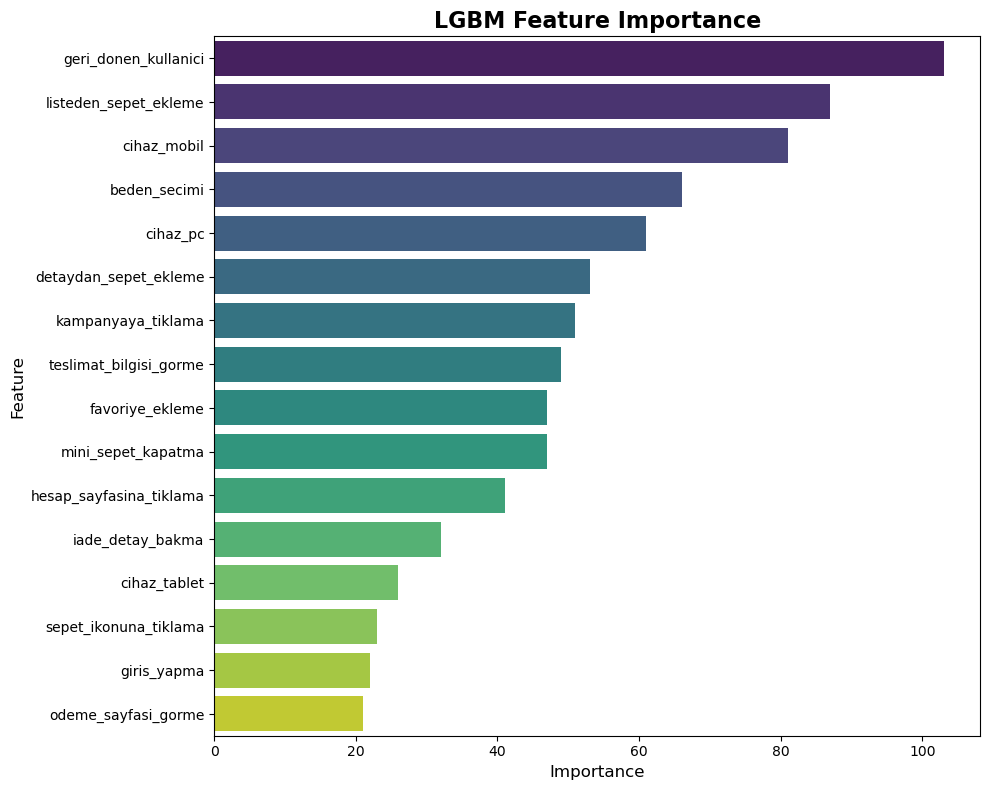

In [113]:
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, y='feature', x='importance', palette='viridis')
plt.title('LGBM Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

In [114]:
df_test = pd.read_csv("C:/Users/Emre/Desktop/customer_behavior_test_useridTR.csv")

In [115]:
df_test.shape

(151655, 20)

In [116]:
test_userid = df_test["userid"]
X_test_final = df_test.drop(["satin_aldi","userid","beden_tablosu_gorme","teslimat_detay_bakma"],axis=1)

In [117]:
print(X_train.columns.tolist())
print(X_test_final.columns.tolist())

['sepet_ikonuna_tiklama', 'listeden_sepet_ekleme', 'detaydan_sepet_ekleme', 'hesap_sayfasina_tiklama', 'kampanyaya_tiklama', 'favoriye_ekleme', 'beden_secimi', 'mini_sepet_kapatma', 'iade_detay_bakma', 'giris_yapma', 'odeme_sayfasi_gorme', 'teslimat_bilgisi_gorme', 'cihaz_mobil', 'cihaz_pc', 'cihaz_tablet', 'geri_donen_kullanici']
['sepet_ikonuna_tiklama', 'listeden_sepet_ekleme', 'detaydan_sepet_ekleme', 'hesap_sayfasina_tiklama', 'kampanyaya_tiklama', 'favoriye_ekleme', 'beden_secimi', 'mini_sepet_kapatma', 'iade_detay_bakma', 'giris_yapma', 'odeme_sayfasi_gorme', 'teslimat_bilgisi_gorme', 'cihaz_mobil', 'cihaz_pc', 'cihaz_tablet', 'geri_donen_kullanici']


In [118]:
test_proba = lgbm_classifier.predict_proba(X_test_final)[:,1]
test_pred =  (test_proba>0.3).astype(int)

In [119]:
output_proba = pd.DataFrame({
    "userid": test_userid,
    "purchase_proba": test_proba.round(4)
})

In [120]:
output_proba.to_csv("customer_propensity_scores.csv",index=False,float_format="%.4f")

In [121]:
report_df = output_proba.copy()

In [122]:
yuzde_95 = report_df["purchase_proba"].quantile(0.95)
yuzde_90 = report_df["purchase_proba"].quantile(0.90)

In [123]:
report_df["top_yuzde5"] = (report_df["purchase_proba"]>= yuzde_95).astype(int)
report_df["top_yuzde10"] = (report_df["purchase_proba"]>= yuzde_90).astype(int)

In [124]:
def segment(p):
    if p >= 0.7:
        return 'Yüksek'
    elif p >= 0.4:
        return 'Orta Seviye'
    else:
        return 'Düşük'

In [125]:
report_df['niyet_segmenti'] = report_df['purchase_proba'].apply(segment)

In [126]:
report_df = report_df.sort_values('purchase_proba', ascending=False).reset_index(drop=True)

In [127]:
report_df.to_csv('customer_propensity_side_report.csv', index=False, float_format='%.4f')